In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
from plotnine import *

pd.options.display.max_rows = 40
pd.options.display.max_columns = 999999

In [2]:
import os
os.chdir("..")

# UDFs

In [3]:
def plot_histogram_per_status(df, cols, use_boarder_valus = True):
    for col in cols:
        if use_boarder_valus == False:
            df = df.loc[(df[col] > 0) & (df[col] < 1), :]
        print(ggplot(df)
         + geom_histogram(aes(x = col))
         + theme_light()
         + xlab("status: " + col)
        )

# Data load

In [4]:
df_application_record = pd.read_csv("data/raw/application_record.csv")
df_application_record.columns = df_application_record.columns.str.lower()
print(df_application_record.shape)
df_application_record.head()

(438557, 18)


id code_gender flag_own_car flag_own_realty  cnt_children  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   amt_income_total      name_income_type            name_education_type  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     name_family_status  name_housing_type  days_birth  days_employed  \
0        Civil marriage   Rented apartment      -12005          -4542   
1        Civil marriage   Rented apartment      -12005          -4542   
2               Married  House / apartment      -21474          -1134   
3  Single / not married  House / apartment      -19110          -3051   
4  Single / not married  House / apartment      -19110          -3051   

   flag_mobil  flag_work_phone  flag_phone  flag_email occupation_type  \
0           1                1           0           0             NaN   
1           1                1           0           0             NaN   
2           1                0           0           0  Security staff   
3           1                0           1           1     Sales staff   
4           1                0           1           1     Sales staff   

   cnt_fam_members  
0              2.0  
1              2.0  
2              2.0  
3              1.0  
4              1.0

In [5]:
df_credit_record = pd.read_csv("data/raw/credit_record.csv")
df_credit_record.columns = df_credit_record.columns.str.lower()
print(df_credit_record.shape)
df_credit_record.head()

(1048575, 3)


id  months_balance status
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C

# credit_record - data understanding and basic exploration

### Basic plots

How many records per person do we have?

<AxesSubplot:ylabel='Frequency'>

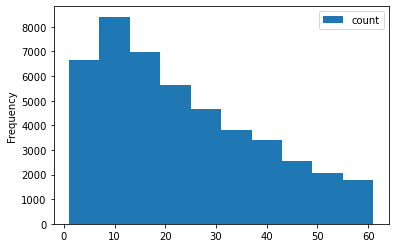

In [6]:
df_credit_record.groupby('id').id.agg(['count']).plot.hist()

How many statuses per person do we have?

<AxesSubplot:ylabel='Frequency'>

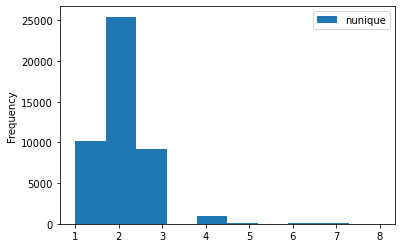

In [7]:
df_credit_record.groupby('id').status.agg(['nunique']).plot.hist()

Which status is the most frequent

In [8]:
df_credit_record.status.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: status, dtype: int64

### History of a single person - examples

In [9]:
df_credit_record.loc[df_credit_record.id == 5001712,:]

id  months_balance status
4   5001712               0      C
5   5001712              -1      C
6   5001712              -2      C
7   5001712              -3      C
8   5001712              -4      C
9   5001712              -5      C
10  5001712              -6      C
11  5001712              -7      C
12  5001712              -8      C
13  5001712              -9      0
14  5001712             -10      0
15  5001712             -11      0
16  5001712             -12      0
17  5001712             -13      0
18  5001712             -14      0
19  5001712             -15      0
20  5001712             -16      0
21  5001712             -17      0
22  5001712             -18      0

In [10]:
df_credit_record.loc[df_credit_record.id == 5150487,:]

id  months_balance status
1048545  5150487               0      C
1048546  5150487              -1      C
1048547  5150487              -2      C
1048548  5150487              -3      C
1048549  5150487              -4      C
1048550  5150487              -5      C
1048551  5150487              -6      C
1048552  5150487              -7      C
1048553  5150487              -8      C
1048554  5150487              -9      C
1048555  5150487             -10      C
1048556  5150487             -11      C
1048557  5150487             -12      C
1048558  5150487             -13      C
1048559  5150487             -14      C
1048560  5150487             -15      C
1048561  5150487             -16      C
1048562  5150487             -17      C
1048563  5150487             -18      C
1048564  5150487             -19      C
1048565  5150487             -20      C
1048566  5150487             -21      C
1048567  5150487             -22      C
1048568  5150487             -23      C
1048569  5150487             -24      C
1048570  5150487             -25      C
1048571  5150487             -26      C
1048572  5150487             -27      C
1048573  5150487             -28      C
1048574  5150487             -29      C

In [11]:
df_credit_record.loc[df_credit_record.id == 5150483,:]

id  months_balance status
1048512  5150483               0      X
1048513  5150483              -1      X
1048514  5150483              -2      X
1048515  5150483              -3      X
1048516  5150483              -4      X
1048517  5150483              -5      X
1048518  5150483              -6      X
1048519  5150483              -7      X
1048520  5150483              -8      X
1048521  5150483              -9      X
1048522  5150483             -10      X
1048523  5150483             -11      X
1048524  5150483             -12      X
1048525  5150483             -13      X
1048526  5150483             -14      X
1048527  5150483             -15      X
1048528  5150483             -16      X
1048529  5150483             -17      X

In [12]:
df_credit_record.loc[df_credit_record.id == 5001713,:]

id  months_balance status
23  5001713               0      X
24  5001713              -1      X
25  5001713              -2      X
26  5001713              -3      X
27  5001713              -4      X
28  5001713              -5      X
29  5001713              -6      X
30  5001713              -7      X
31  5001713              -8      X
32  5001713              -9      X
33  5001713             -10      X
34  5001713             -11      X
35  5001713             -12      X
36  5001713             -13      X
37  5001713             -14      X
38  5001713             -15      X
39  5001713             -16      X
40  5001713             -17      X
41  5001713             -18      X
42  5001713             -19      X
43  5001713             -20      X
44  5001713             -21      X

In [13]:
df_credit_record.loc[df_credit_record.id == 5150485,:]

id  months_balance status
1048543  5150485               0      0
1048544  5150485              -1      0

# credit_record data prep

In [14]:
df_credit_record_aggregated_1 = df_credit_record.loc[:, ['id', 'status']].groupby(['id', 'status']).value_counts().reset_index()
df_credit_record_aggregated_1.columns = ['id', 'status', 'count_status']
df_credit_record_aggregated_1

id status  count_status
0      5001711      0             3
1      5001711      X             1
2      5001712      0            10
3      5001712      C             9
4      5001713      X            22
...        ...    ...           ...
94138  5150483      X            18
94139  5150484      0            12
94140  5150484      C             1
94141  5150485      0             2
94142  5150487      C            30

[94143 rows x 3 columns]

In [15]:
df_credit_record_aggregated_2 = df_credit_record.loc[:, ['id']].groupby(['id']).value_counts().reset_index()
df_credit_record_aggregated_2.columns = ['id', 'count_all']
df_credit_record_aggregated_2

id  count_all
0      5001711          4
1      5001712         19
2      5001713         22
3      5001714         15
4      5001715         60
...        ...        ...
45980  5150482         18
45981  5150483         18
45982  5150484         13
45983  5150485          2
45984  5150487         30

[45985 rows x 2 columns]

In [16]:
df_credit_record_aggregated = df_credit_record_aggregated_1.merge(df_credit_record_aggregated_2, left_on = ['id'], right_on = ['id'])
df_credit_record_aggregated['share_status'] = df_credit_record_aggregated['count_status'] / df_credit_record_aggregated['count_all']
df_credit_record_aggregated = df_credit_record_aggregated.drop('count_status', axis = 1)
df_credit_record_aggregated

id status  count_all  share_status
0      5001711      0          4      0.750000
1      5001711      X          4      0.250000
2      5001712      0         19      0.526316
3      5001712      C         19      0.473684
4      5001713      X         22      1.000000
...        ...    ...        ...           ...
94138  5150483      X         18      1.000000
94139  5150484      0         13      0.923077
94140  5150484      C         13      0.076923
94141  5150485      0          2      1.000000
94142  5150487      C         30      1.000000

[94143 rows x 4 columns]

In [17]:
# checks
print(df_credit_record_aggregated_1.shape)
print(df_credit_record_aggregated_2.shape)
print(df_credit_record_aggregated.shape)

(94143, 3)
(45985, 2)
(94143, 4)


In [18]:
df_credit_record_aggregated.head()

id status  count_all  share_status
0  5001711      0          4      0.750000
1  5001711      X          4      0.250000
2  5001712      0         19      0.526316
3  5001712      C         19      0.473684
4  5001713      X         22      1.000000

In [19]:
del(df_credit_record_aggregated_1, df_credit_record_aggregated_2)

In [20]:
df_credit_record_wide = pd.pivot(df_credit_record_aggregated, index = ['id', 'count_all'],
                                 columns = 'status', values = 'share_status') #Reshape from long to wide
df_credit_record_wide = df_credit_record_wide.fillna(value = 0)
df_credit_record_wide = df_credit_record_wide.reset_index()
df_credit_record_wide['count_informative_statuses'] = df_credit_record_wide.count_all * (
    df_credit_record_wide['0'] + df_credit_record_wide['1'] + 
    df_credit_record_wide['2'] + df_credit_record_wide['3'] + 
    df_credit_record_wide['4'] + df_credit_record_wide['5'] + 
    df_credit_record_wide['C']) 
df_credit_record_wide = df_credit_record_wide.set_index(['id', 'count_all', 'count_informative_statuses'])
df_credit_record_wide

status                                               0    1    2    3    4  \
id      count_all count_informative_statuses                                 
5001711 4         3.0                         0.750000  0.0  0.0  0.0  0.0   
5001712 19        19.0                        0.526316  0.0  0.0  0.0  0.0   
5001713 22        0.0                         0.000000  0.0  0.0  0.0  0.0   
5001714 15        0.0                         0.000000  0.0  0.0  0.0  0.0   
5001715 60        0.0                         0.000000  0.0  0.0  0.0  0.0   
...                                                ...  ...  ...  ...  ...   
5150482 18        18.0                        0.666667  0.0  0.0  0.0  0.0   
5150483 18        0.0                         0.000000  0.0  0.0  0.0  0.0   
5150484 13        13.0                        0.923077  0.0  0.0  0.0  0.0   
5150485 2         2.0                         1.000000  0.0  0.0  0.0  0.0   
5150487 30        30.0                        0.000000  0.0  0.0  0.0  0.0   

status                                          5         C     X  
id      count_all count_informative_statuses                       
5001711 4         3.0                         0.0  0.000000  0.25  
5001712 19        19.0                        0.0  0.473684  0.00  
5001713 22        0.0                         0.0  0.000000  1.00  
5001714 15        0.0                         0.0  0.000000  1.00  
5001715 60        0.0                         0.0  0.000000  1.00  
...                                           ...       ...   ...  
5150482 18        18.0                        0.0  0.333333  0.00  
5150483 18        0.0                         0.0  0.000000  1.00  
5150484 13        13.0                        0.0  0.076923  0.00  
5150485 2         2.0                         0.0  0.000000  0.00  
5150487 30        30.0                        0.0  1.000000  0.00  

[45985 rows x 8 columns]

## Distribution of all categories - all values

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 28'. Pick better value with 'binwidth'.


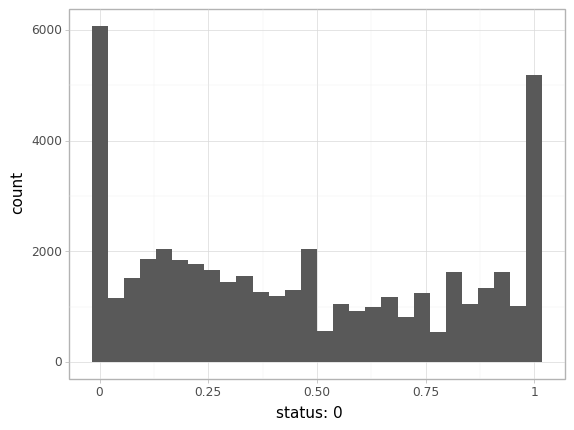

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 215'. Pick better value with 'binwidth'.


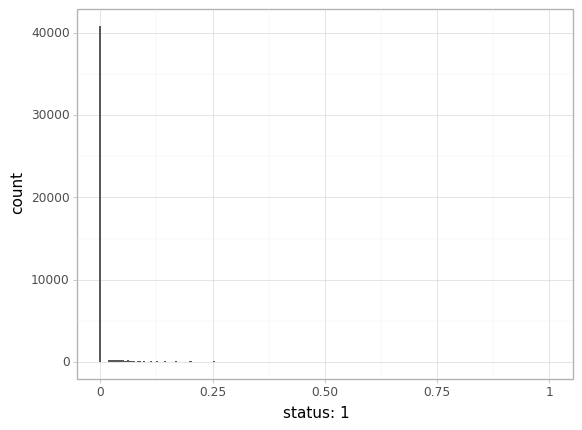

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 215'. Pick better value with 'binwidth'.


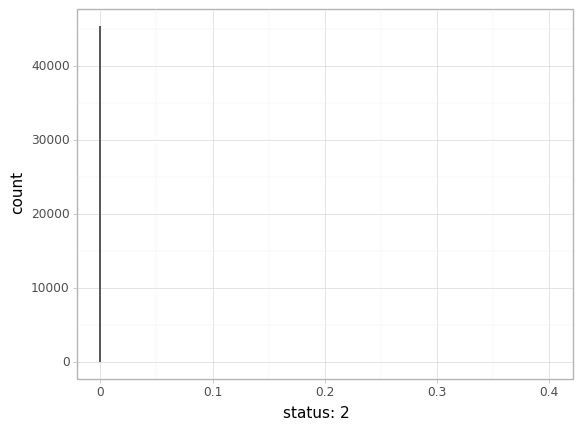

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 215'. Pick better value with 'binwidth'.


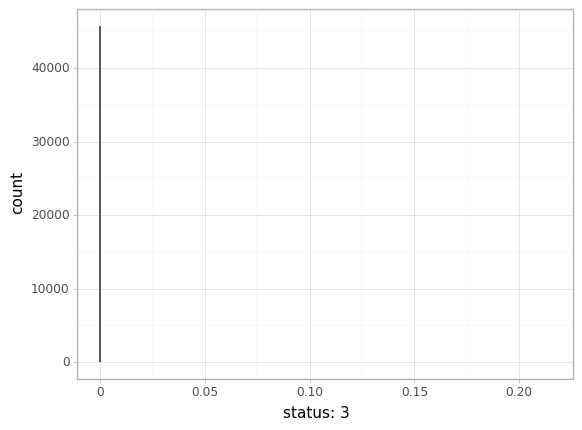

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 215'. Pick better value with 'binwidth'.


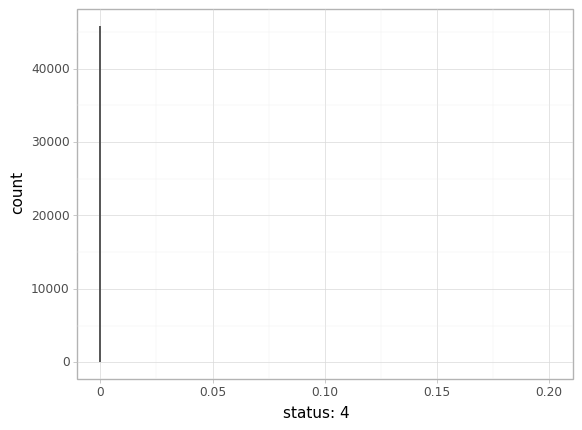

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 215'. Pick better value with 'binwidth'.


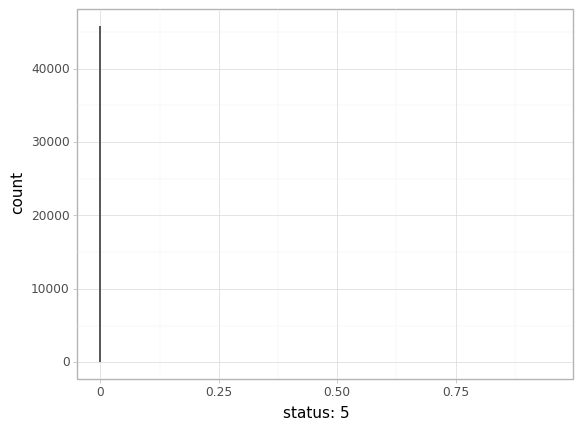

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 27'. Pick better value with 'binwidth'.


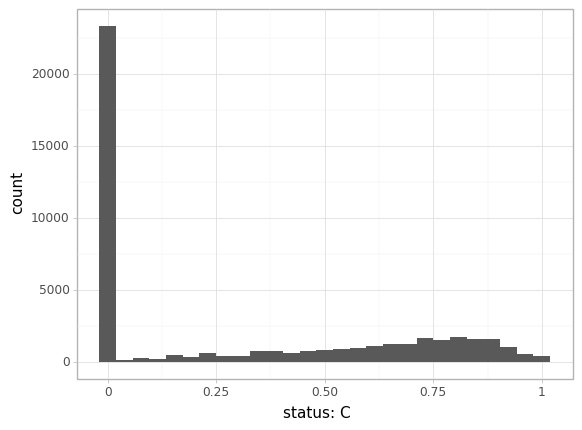

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 61'. Pick better value with 'binwidth'.


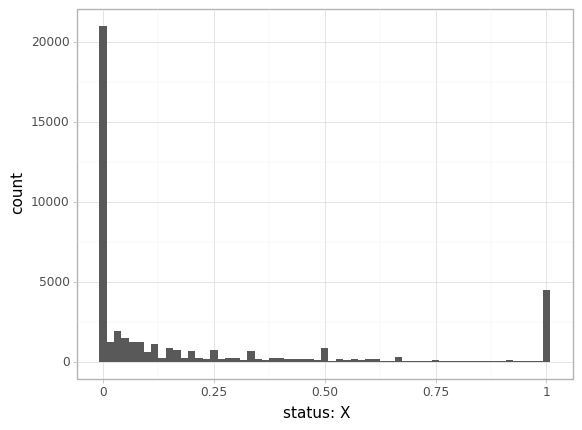

In [21]:
plot_histogram_per_status(df = df_credit_record_wide,
                          cols = df_credit_record_wide.columns,
                          use_boarder_valus = True)

## Distribution of all categories - 0 and 1 removed

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 32'. Pick better value with 'binwidth'.


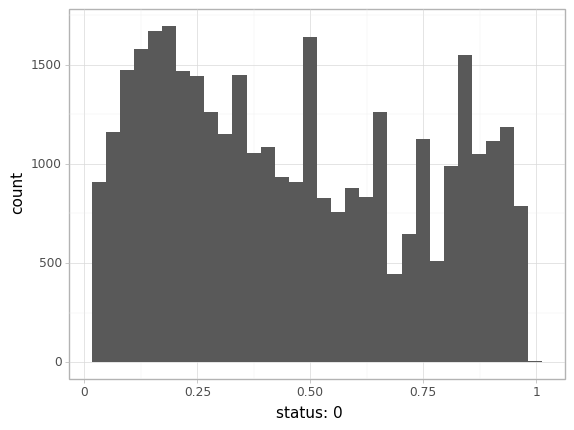

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 79'. Pick better value with 'binwidth'.


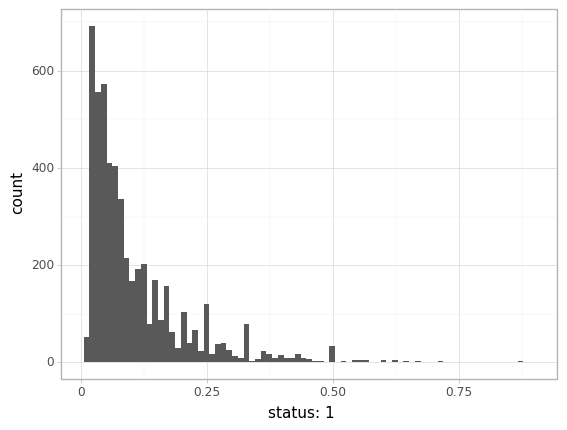

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 37'. Pick better value with 'binwidth'.


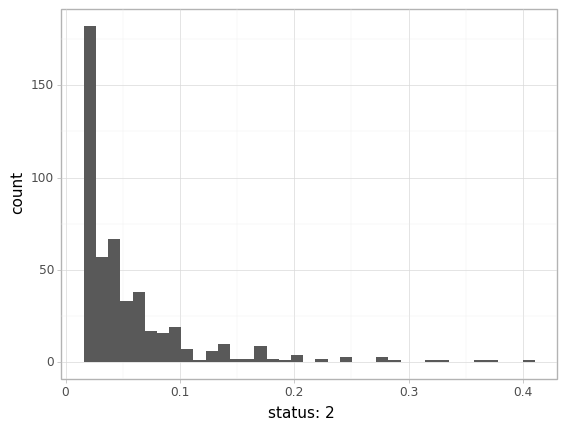

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.


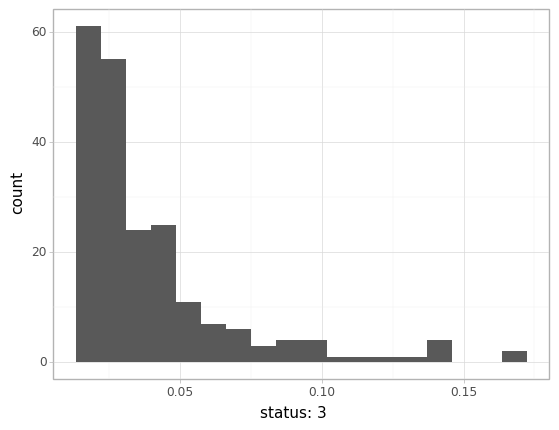

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 16'. Pick better value with 'binwidth'.


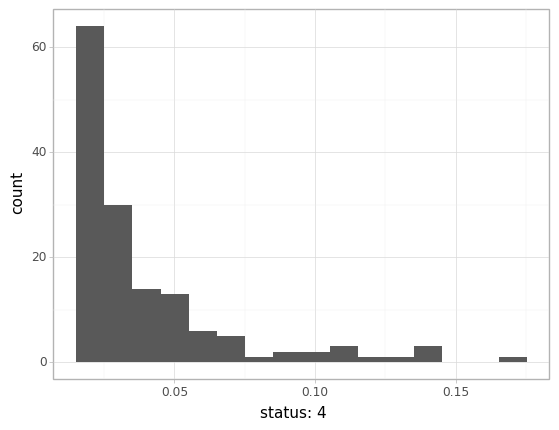

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 8'. Pick better value with 'binwidth'.


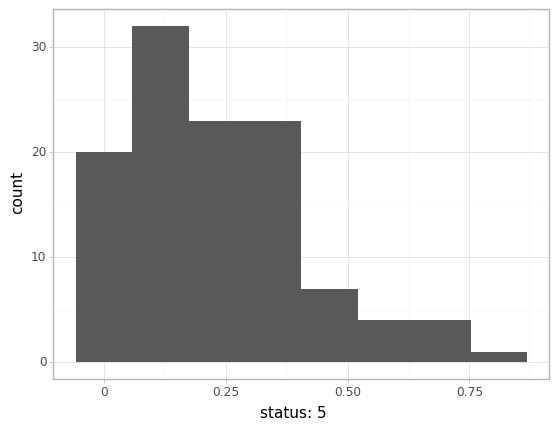

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 5'. Pick better value with 'binwidth'.


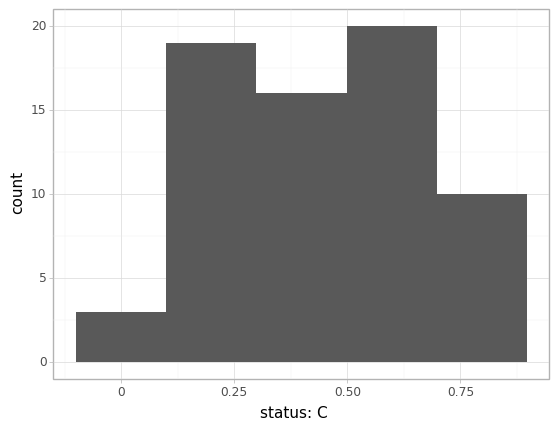

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 3'. Pick better value with 'binwidth'.


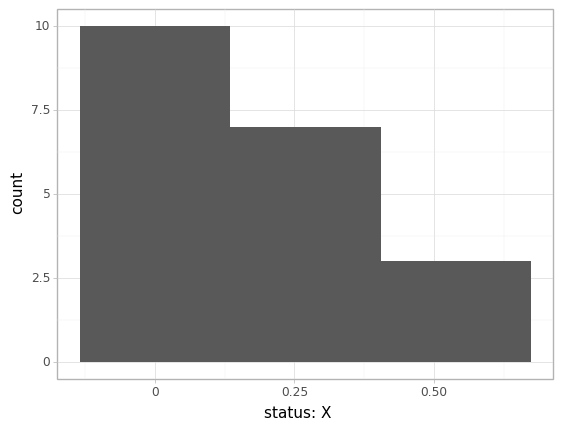

In [22]:
plot_histogram_per_status(df = df_credit_record_wide,
                          cols = df_credit_record_wide.columns,
                          use_boarder_valus = False)

# credit_record - Customers classification

In [23]:
df_credit_record_wide['customer_status'] = np.where(
    df_credit_record_wide.reset_index()["count_all"] < 12, 'too short history', np.where(
        df_credit_record_wide.reset_index()["count_informative_statuses"] < 12, 'too short history', np.where(
            df_credit_record_wide['X'] == 1, 'too short history', np.where(
                df_credit_record_wide['C'] == 1, 'perfect customer', np.where(
                    df_credit_record_wide['C'] + df_credit_record_wide['X'] == 1, 'perfect customer', np.where(
                        df_credit_record_wide['5'] > 0, 'bad customer', np.where(
                            df_credit_record_wide['4'] > 0, 'bad customer', np.where(
                                df_credit_record_wide['C'] + df_credit_record_wide['X'] + df_credit_record_wide['0'] > 0.7, 'good customer', np.where(
                                    df_credit_record_wide['C'] + df_credit_record_wide['X'] + df_credit_record_wide['0'] + df_credit_record_wide['1'] > 0.7, 'moderate customer', np.where(
                                        (df_credit_record_wide['3'] < 0.2) & (df_credit_record_wide['4'] == 0) & (df_credit_record_wide['5'] == 0), 'moderate customer', 'other'
                                    ))))))))))

<AxesSubplot:>

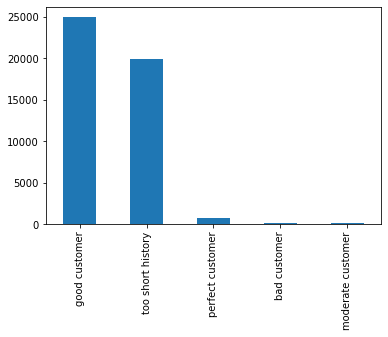

In [24]:
df_credit_record_wide.customer_status.value_counts().plot(kind = 'bar')

In [25]:
df_credit_record_wide.head()

status                                               0    1    2    3    4  \
id      count_all count_informative_statuses                                 
5001711 4         3.0                         0.750000  0.0  0.0  0.0  0.0   
5001712 19        19.0                        0.526316  0.0  0.0  0.0  0.0   
5001713 22        0.0                         0.000000  0.0  0.0  0.0  0.0   
5001714 15        0.0                         0.000000  0.0  0.0  0.0  0.0   
5001715 60        0.0                         0.000000  0.0  0.0  0.0  0.0   

status                                          5         C     X  \
id      count_all count_informative_statuses                        
5001711 4         3.0                         0.0  0.000000  0.25   
5001712 19        19.0                        0.0  0.473684  0.00   
5001713 22        0.0                         0.0  0.000000  1.00   
5001714 15        0.0                         0.0  0.000000  1.00   
5001715 60        0.0                         0.0  0.000000  1.00   

status                                          customer_status  
id      count_all count_informative_statuses                     
5001711 4         3.0                         too short history  
5001712 19        19.0                            good customer  
5001713 22        0.0                         too short history  
5001714 15        0.0                         too short history  
5001715 60        0.0                         too short history

In [26]:
df_credit_record_wide.tail()

status                                               0    1    2    3    4  \
id      count_all count_informative_statuses                                 
5150482 18        18.0                        0.666667  0.0  0.0  0.0  0.0   
5150483 18        0.0                         0.000000  0.0  0.0  0.0  0.0   
5150484 13        13.0                        0.923077  0.0  0.0  0.0  0.0   
5150485 2         2.0                         1.000000  0.0  0.0  0.0  0.0   
5150487 30        30.0                        0.000000  0.0  0.0  0.0  0.0   

status                                          5         C    X  \
id      count_all count_informative_statuses                       
5150482 18        18.0                        0.0  0.333333  0.0   
5150483 18        0.0                         0.0  0.000000  1.0   
5150484 13        13.0                        0.0  0.076923  0.0   
5150485 2         2.0                         0.0  0.000000  0.0   
5150487 30        30.0                        0.0  1.000000  0.0   

status                                          customer_status  
id      count_all count_informative_statuses                     
5150482 18        18.0                            good customer  
5150483 18        0.0                         too short history  
5150484 13        13.0                            good customer  
5150485 2         2.0                         too short history  
5150487 30        30.0                         perfect customer

In [27]:
df_credit_record_wide.loc[df_credit_record_wide.customer_status == 'other', :]

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, C, X, customer_status]
Index: []

# Dataset merging

In [28]:
df_credit_record_wide = df_credit_record_wide.reset_index().loc[:, ['id', 'customer_status']]
df_merged = df_application_record.merge(df_credit_record_wide, left_on = ['id'], right_on = ['id'])

In [29]:
# checks
print(df_application_record.shape)
print(df_credit_record_wide.shape)
print(df_merged.shape)

(438557, 18)
(45985, 2)
(36457, 19)


<AxesSubplot:>

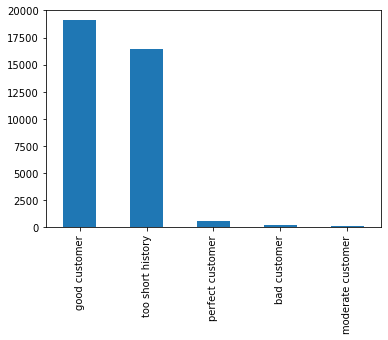

In [30]:
df_merged.customer_status.value_counts().plot(kind = 'bar')

# Selection of customers for modeling

In [31]:
df_merged = df_merged.loc[~(df_merged.customer_status == 'too short history')]
df_merged = df_merged.set_index('id')
print(df_merged.shape)
df_merged.head()

(19996, 18)


code_gender flag_own_car flag_own_realty  cnt_children  \
id                                                               
5008804           M            Y               Y             0   
5008805           M            Y               Y             0   
5008806           M            Y               Y             0   
5008810           F            N               Y             0   
5008811           F            N               Y             0   

         amt_income_total      name_income_type  \
id                                                
5008804          427500.0               Working   
5008805          427500.0               Working   
5008806          112500.0               Working   
5008810          270000.0  Commercial associate   
5008811          270000.0  Commercial associate   

                   name_education_type    name_family_status  \
id                                                             
5008804               Higher education        Civil marriage   
5008805               Higher education        Civil marriage   
5008806  Secondary / secondary special               Married   
5008810  Secondary / secondary special  Single / not married   
5008811  Secondary / secondary special  Single / not married   

         name_housing_type  days_birth  days_employed  flag_mobil  \
id                                                                  
5008804   Rented apartment      -12005          -4542           1   
5008805   Rented apartment      -12005          -4542           1   
5008806  House / apartment      -21474          -1134           1   
5008810  House / apartment      -19110          -3051           1   
5008811  House / apartment      -19110          -3051           1   

         flag_work_phone  flag_phone  flag_email occupation_type  \
id                                                                 
5008804                1           0           0             NaN   
5008805                1           0           0             NaN   
5008806                0           0           0  Security staff   
5008810                0           1           1     Sales staff   
5008811                0           1           1     Sales staff   

         cnt_fam_members customer_status  
id                                        
5008804              2.0   good customer  
5008805              2.0   good customer  
5008806              2.0   good customer  
5008810              1.0   good customer  
5008811              1.0   good customer

In [32]:
df_merged.customer_status.value_counts().to_frame('count').join(
    df_merged.customer_status.value_counts(normalize=True).to_frame('share'))

count     share
good customer      19086  0.954491
perfect customer     601  0.030056
bad customer         193  0.009652
moderate customer    116  0.005801

In [33]:
df_merged.to_pickle('data/processed/df_application_record_classified_raw.pickle')

# Profiling report

In [34]:
pandas_profiling_raw = ProfileReport(df_merged, title = "Report - pandas_profiling - raw dataset")
pandas_profiling_raw.to_file("reports/Report pandas-profiler - raw data.html")
pandas_profiling_raw.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
# check
df_merged.groupby(['flag_mobil', 'flag_phone'])['flag_phone'].count().unstack()

flag_phone      0     1
flag_mobil             
1           14035  5961

In [36]:
df_merged.groupby(['flag_work_phone', 'flag_phone'])['flag_phone'].count().unstack()

flag_phone           0     1
flag_work_phone             
0                11990  3422
1                 2045  2539

# Feature engineerging

In [37]:
df_merged2 = df_merged.copy()
df_merged2.occupation_type = df_merged2.occupation_type.fillna("Unknown")
df_merged2['amt_income_per_person'] = df_merged2['amt_income_total'] / df_merged2['cnt_fam_members']
df_merged2['age'] = -1 * df_merged2['days_birth'] / 365
df_merged2['job_tenure'] = -1 * df_merged2['days_employed'] / 365
df_merged2['job_tenure'] = np.where(df_merged2["days_employed"] > 0, -1, df_merged2['job_tenure'])
df_merged2['flag_employed'] = np.where(df_merged2["days_employed"] > 0, 0, 1)
df_merged2['code_gender'] = np.where(df_merged2['code_gender'] == 'M', 1, 0)
df_merged2['flag_own_car'] = np.where(df_merged2['flag_own_car'] =='Y', 1, 0)
df_merged2['flag_own_realty'] = np.where(df_merged2['flag_own_realty'] =='Y', 1, 0)
df_merged2['single_adult'] = np.where(
    (df_merged2['name_family_status'] =='Married') | (df_merged2['name_family_status'] == 'Civil marriage'), 0, 1)
df_merged2['target'] = np.where((df_merged2['customer_status'] =='bad customer') | (df_merged2['customer_status'] =='moderate customer'), 1, 0)
df_merged2 = df_merged2.astype({'flag_own_car': int, 
                                'flag_own_realty': int, 
                                'cnt_children': int,
                                'cnt_fam_members': int})

In [38]:
# check - there should be no people with flag_work_phone = 1 and flag_employed = 0
df_merged2.groupby(['flag_work_phone', 'flag_employed'])['flag_employed'].count().unstack()

flag_employed         0        1
flag_work_phone                 
0                3240.0  12172.0
1                   NaN   4584.0

In [39]:
df_merged2.groupby(['name_family_status', 'single_adult'])['single_adult'].count().unstack()

single_adult                0       1
name_family_status                   
Civil marriage         1526.0     NaN
Married               14016.0     NaN
Separated                 NaN  1181.0
Single / not married      NaN  2517.0
Widow                     NaN   756.0

In [40]:
# check age and tenure distribution

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 35'. Pick better value with 'binwidth'.


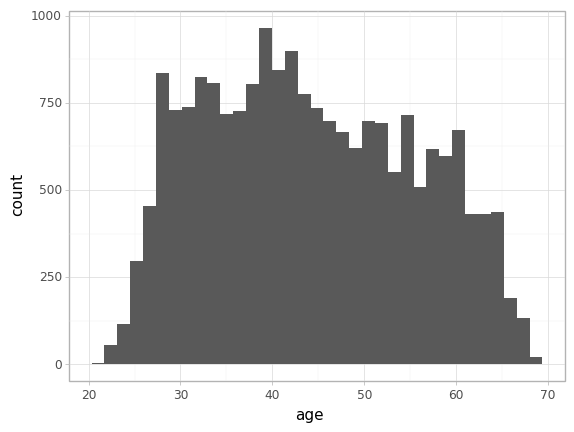

<ggplot: (111907626912)>

In [41]:
(ggplot(df_merged2)
 + geom_histogram(aes(x = 'age'))
 + theme_light()
 + xlab('age'))

C:\Users\Winter\anaconda3\envs\credit-admission-prediction\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 78'. Pick better value with 'binwidth'.


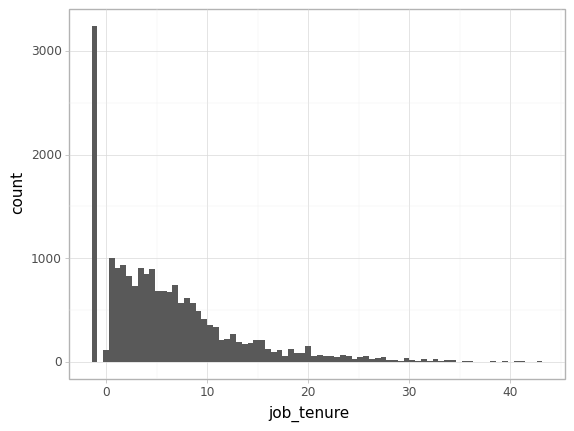

<ggplot: (111907997425)>

In [42]:
(ggplot(df_merged2)
 + geom_histogram(aes(x = 'job_tenure'))
 + theme_light()
 + xlab('job_tenure'))

In [43]:
df_merged2 = df_merged2.drop(['flag_mobil', 'flag_work_phone', 'flag_phone', 
                              'flag_email', 'days_birth', 'days_employed',
                              'name_family_status', 'customer_status'], axis = 1)
df_merged2

code_gender  flag_own_car  flag_own_realty  cnt_children  \
id                                                                  
5008804            1             1                1             0   
5008805            1             1                1             0   
5008806            1             1                1             0   
5008810            0             0                1             0   
5008811            0             0                1             0   
...              ...           ...              ...           ...   
5149729            1             1                1             0   
5149775            0             1                1             0   
5149834            0             0                1             0   
5149838            0             0                1             0   
5150337            1             0                1             0   

         amt_income_total      name_income_type  \
id                                                
5008804          427500.0               Working   
5008805          427500.0               Working   
5008806          112500.0               Working   
5008810          270000.0  Commercial associate   
5008811          270000.0  Commercial associate   
...                   ...                   ...   
5149729           90000.0               Working   
5149775          130500.0               Working   
5149834          157500.0  Commercial associate   
5149838          157500.0             Pensioner   
5150337          112500.0               Working   

                   name_education_type  name_housing_type occupation_type  \
id                                                                          
5008804               Higher education   Rented apartment         Unknown   
5008805               Higher education   Rented apartment         Unknown   
5008806  Secondary / secondary special  House / apartment  Security staff   
5008810  Secondary / secondary special  House / apartment     Sales staff   
5008811  Secondary / secondary special  House / apartment     Sales staff   
...                                ...                ...             ...   
5149729  Secondary / secondary special  House / apartment         Unknown   
5149775  Secondary / secondary special  House / apartment        Laborers   
5149834               Higher education  House / apartment  Medicine staff   
5149838               Higher education  House / apartment  Medicine staff   
5150337  Secondary / secondary special   Rented apartment        Laborers   

         cnt_fam_members  amt_income_per_person        age  job_tenure  \
id                                                                       
5008804                2               213750.0  32.890411   12.443836   
5008805                2               213750.0  32.890411   12.443836   
5008806                2                56250.0  58.832877    3.106849   
5008810                1               270000.0  52.356164    8.358904   
5008811                1               270000.0  52.356164    8.358904   
...                  ...                    ...        ...         ...   
5149729                2                45000.0  52.331507    4.715068   
5149775                2                65250.0  44.210959   25.728767   
5149834                2                78750.0  33.936986    3.630137   
5149838                2                78750.0  33.936986    3.630137   
5150337                1               112500.0  25.172603    3.268493   

         flag_employed  single_adult  target  
id                                            
5008804              1             0       0  
5008805              1             0       0  
5008806              1             0       0  
5008810              1             1       0  
5008811              1             1       0  
...                ...           ...     ...  
5149729              1             0       0  
5149775              1             0       0  
5149834     

In [44]:
df_merged2.to_pickle('data/processed/df_application_record_classified_post_feature_eng.pickle')

df_merged2.info()

## Correlation analysis - to be continued

In [45]:
from scipy.stats import f_oneway

In [46]:
num_vars = ['amt_income_total', 'amt_income_per_person', 'age', 'job_tenure', 'cnt_fam_members', 'cnt_children']
for var in num_vars:
    CategoryGroupLists=df_merged2.groupby('target')[var].apply(list)
    print('P-Value for Anova for variable ',var,' is: ', round(f_oneway(*CategoryGroupLists)[1],3))

P-Value for Anova for variable  amt_income_total  is:  0.193
P-Value for Anova for variable  amt_income_per_person  is:  0.046
P-Value for Anova for variable  age  is:  0.182
P-Value for Anova for variable  job_tenure  is:  0.033
P-Value for Anova for variable  cnt_fam_members  is:  0.726
P-Value for Anova for variable  cnt_children  is:  0.713


# Profiling report

In [ ]:
pandas_profiling_post_feat_eng = ProfileReport(df_merged2, title = "Report - pandas_profiling - post feature engineering")
pandas_profiling_post_feat_eng.to_file("reports/Report pandas-profiler - post feature engineering.html")
pandas_profiling_post_feat_eng.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]